In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import defaultdict
from spacy.util import minibatch
from spacy.util import compounding
import spacy
import os
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from collections import Counter
import plotly.figure_factory as ff
import plotly.express as px
from plotly import graph_objs as go
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]


In [4]:
import plotly.io as pio
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [5]:
pio.renderers.default = "notebook_connected"


In [6]:
!ls /fp/projects01/ec307/ec-krimhau/jira_datasets/high_highest_vs_rest

highest_high_vs_rest_balanced_jira.csv


In [7]:
file_name = "highest_high_vs_rest_balanced_jira.csv"
path_name = "/fp/projects01/ec307/ec-krimhau/jira_datasets/high_highest_vs_rest/"
full_name = f"{path_name}/{file_name}"

In [8]:
import pandas as pd
df = pd.read_csv(full_name, index_col=0)
df

,text
label,
1,we need to bump the version to example image e...
1,right now it is almost impossible to create se...
0,android photo picker
1,create a maven assembly to produce a zip file ...
0,with theres now support for a property names h...
...,...
1,noformatnopaneltrueexternalstestspy fileextern...
0,running this program will throw a tableexcepti...
1,after creating new instance from bare karaf in...


In [9]:
# Drop NaN values and reset index of dataframe
df = df[df['text'].notna()]
df = df.reset_index()

In [10]:
df


,label,text
0,1,we need to bump the version to example image e...
1,1,right now it is almost impossible to create se...
2,0,android photo picker
3,1,create a maven assembly to produce a zip file ...
4,0,with theres now support for a property names h...
...,...,...
273519,1,noformatnopaneltrueexternalstestspy fileextern...
273520,0,running this program will throw a tableexcepti...
273521,1,after creating new instance from bare karaf in...
273522,0,fileinputdstream streaming ui s records should...


In [11]:
df["label"].value_counts()

label
1    136762
0    136762
Name: count, dtype: int64

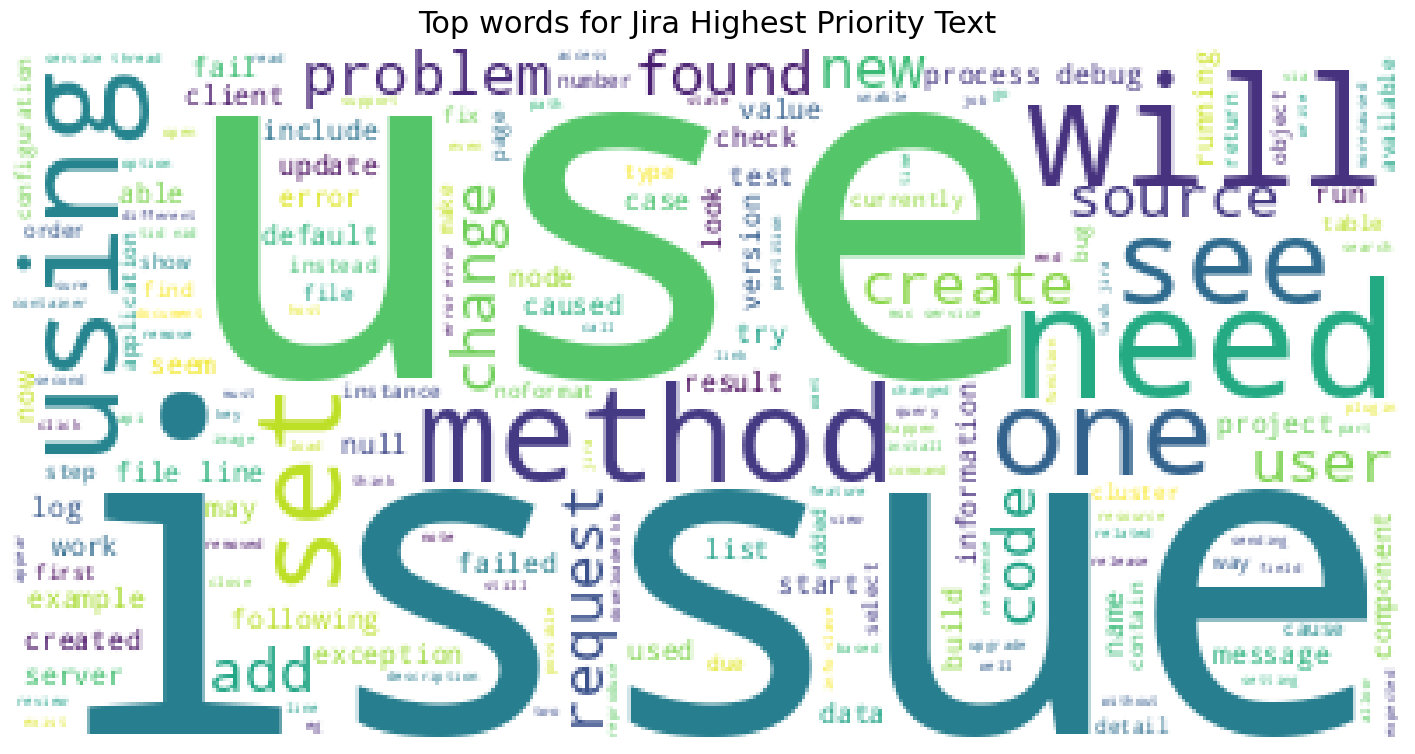

In [12]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 1, 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira Highest Priority Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()


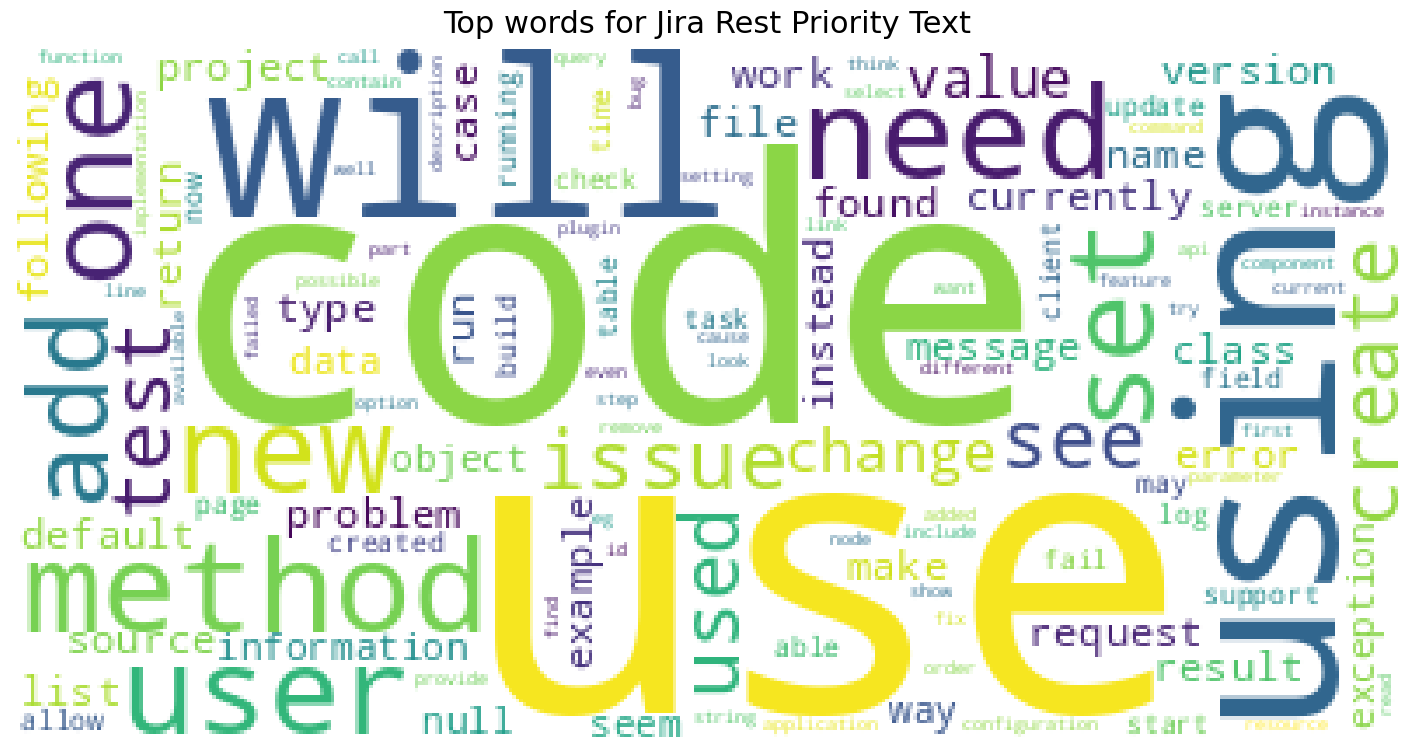

In [13]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 0, 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira Rest Priority Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [14]:
top_debt_words = wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 1, 'text']))


In [15]:
top_debt_words.words_

{'use': 1.0,
 'issue': 0.8473643560532922,
 'need': 0.8443715002896311,
 'will': 0.7482139409152346,
 'method': 0.747296775439274,
 'using': 0.7434832979339641,
 'one': 0.6789438115466306,
 'see': 0.6495462444487353,
 'set': 0.6292720602432902,
 'problem': 0.6157559374396602,
 'new': 0.6145974126279204,
 'user': 0.6097219540451825,
 'code': 0.6023846302374976,
 'create': 0.5778142498551844,
 'source': 0.5628982429040356,
 'change': 0.557346978181116,
 'add': 0.5546920254875458,
 'found': 0.5503958293106778,
 'request': 0.5480787796871983,
 'process debug': 0.518681212589303,
 'used': 0.5057926240586986,
 'test': 0.4715195983780653,
 'project': 0.4554450666151767,
 'following': 0.445066615176675,
 'fail': 0.43352963892643365,
 'run': 0.43232284224753814,
 'work': 0.4263371307202163,
 'start': 0.4233442749565553,
 'message': 0.41562077621162385,
 'case': 0.40915234601274375,
 'seem': 0.40683529638926436,
 'file line': 0.4009461285962541,
 'result': 0.39727746669241165,
 'server': 0.39500

In [16]:
top_debt_words_0 = wc.generate(
    ' '.join(text for text in df.loc[df['label'] == 0, 'text']))


In [17]:
top_debt_words_0.words_

{'use': 1.0,
 'code': 0.8178272739090869,
 'will': 0.7212375958746804,
 'using': 0.7087576374745418,
 'method': 0.7040776530744898,
 'need': 0.6962776790744031,
 'user': 0.629804567318109,
 'new': 0.611431295229016,
 'one': 0.5947480175066083,
 'set': 0.5923646921176929,
 'add': 0.5345148849503835,
 'issue': 0.5091649694501018,
 'test': 0.50790830697231,
 'create': 0.4842050526498245,
 'see': 0.4731117562941457,
 'used': 0.46851843827187245,
 'change': 0.46058846470511766,
 'value': 0.43333188889370367,
 'currently': 0.42037526541578196,
 'file': 0.41872860423798586,
 'problem': 0.41136196212679293,
 'example': 0.41001863327122245,
 'error': 0.4044286519044937,
 'project': 0.39502534991550026,
 'version': 0.3910820297265676,
 'case': 0.3892187026043247,
 'work': 0.3709320968930104,
 'following': 0.3683321055596481,
 'message': 0.36802877323742256,
 'class': 0.36187546041513197,
 'name': 0.35780214065953114,
 'request': 0.3568054773150756,
 'source': 0.35117216275945745,
 'default': 0.3

In [18]:
df['text_len'] = df['text'].apply(lambda x: len(x.split(' ')))
df.head()


,label,text,text_len
0,1,we need to bump the version to example image e...,10
1,1,right now it is almost impossible to create se...,20
2,0,android photo picker,3
3,1,create a maven assembly to produce a zip file ...,34
4,0,with theres now support for a property names h...,36


In [19]:
# Assuming 'text_len' is already calculated as shown previously
description = df['text_len'].describe()

# Applying formatting to make numbers more readable
formatted_description = description.apply(lambda x: f"{x:,.0f}")
print(formatted_description)

count    273,524
mean          84
std          252
min            1
25%           26
50%           51
75%           95
max       70,550
Name: text_len, dtype: object


In [20]:
df['text_len'].describe()

count    273524.000000
mean         84.079130
std         251.797791
min           1.000000
25%          26.000000
50%          51.000000
75%          95.000000
max       70550.000000
Name: text_len, dtype: float64

In [ ]:
balance_counts = df.groupby('label')['label'].agg('count').values
balance_counts


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Non-'],
    y=[balance_counts[0]],
    name='Non-TD',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color=primary_blue
))
fig.add_trace(go.Bar(
    x=['TD'],
    y=[balance_counts[1]],
    name='TD',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color=primary_grey
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by label</span>'
)
fig.show()


In [ ]:
Non_df = df[df['label'] == 0]['text_len'].value_counts().sort_index()
df1 = df[df['label'] == 1]['text_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=Non_df.index,
    y=Non_df.values,
    name='Rest',
    fill='tozeroy',
    marker_color=primary_blue,
))
fig.add_trace(go.Scatter(
    x=df1.index,
    y=df1.values,
    name='Highest Priority',
    fill='tozeroy',
    marker_color=primary_grey,
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Message length</span>'
)
fig.update_xaxes(range=[0, 300])
fig.show()


In [ ]:
from nltk.util import ngrams
from plotly import tools
import plotly.offline as py
import nltk
nltk.download('stopwords')

In [ ]:
#Gram analysis on Training set- Bigram and Trigram
stopword = set(stopwords.words('english'))


def gram_analysis(data, gram):
    tokens = [t for t in data.lower().split(
        " ") if t != "" if t not in stopword]
    ngrams = zip(*[tokens[i:] for i in range(gram)])
    final_tokens = [" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis

def create_dict(data, grams):
    freq_dict = defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence, grams):
            freq_dict[tokens] += 1
    return freq_dict


def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace


def create_new_df(freq_dict,):
    freq_df = pd.DataFrame(sorted(freq_dict.items(), key=lambda z: z[1])[::-1])
    freq_df.columns = ['n_gram_words', 'n_gram_frequency']
   
    trace = horizontal_bar_chart(freq_df[:20], 'orange')
    return trace


def plot_grams(trace_zero, trace_one):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                              subplot_titles=["Frequent words of Non_TD ",
                                              "Frequent words of TD"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900,
                         paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')


In [ ]:
df_zero = df[df['label'] == 0]
df_ones= df[df['label'] == 1]

In [ ]:
print("Bi-gram analysis")
freq_df_zero=create_dict(df_zero["text"],2)

In [ ]:
trace_zero = create_new_df(freq_df_zero)
freq_df_ones = create_dict(df_ones["text"], 2)
trace_ones = create_new_df(freq_df_ones)


In [ ]:
plot_grams(trace_zero, trace_ones)


In [ ]:
print("Tri-gram analysis")
freq_df_zero = create_dict(df_zero["text"], 3)
trace_zero=create_new_df(freq_df_zero)
freq_df_ones = create_dict(df_ones["text"], 3)
trace_ones=create_new_df(freq_df_ones)
plot_grams(trace_zero,trace_ones)